# Projet DataBeez

In [1]:
# import des packages courants

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

# importation des packages pour le pretraitement des donnees
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer

# importation des packages des modeles de prediction

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# importation des packages de performances
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('german_credit_data.csv') # importation de la base de donnees

In [ ]:
data.head() # visualisation des cinq premiers lignes

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
data.shape

(1000, 11)

In [ ]:
data.info() # les information de la base de donnees

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              1000 non-null   int64 
 1   sexe             1000 non-null   object
 2   travail          1000 non-null   int64 
 3   domicile         1000 non-null   object
 4   conpte courant   817 non-null    object
 5   conpte depargne  606 non-null    object
 6   credit           1000 non-null   int64 
 7   duree            1000 non-null   int64 
 8   objectifs        1000 non-null   object
 9   risque           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [ ]:
(data.isnull().sum()/data.shape[0])*100 # visualisation des donnees manquantes

Unnamed: 0           0.0
Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64

In [6]:
data.drop(data.columns[0],axis=1,inplace=  True) # suppression de la colonne Unnamed:0

In [7]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


### Renomages des colonnes 

In [8]:
# renommages des colonnes du dataframe
data.columns = ["age","sexe","travail","domicile","conpte courant","conpte depargne",
                "credit","duree","objectifs","risque"] 

In [9]:
data.head()

,age,sexe,travail,domicile,conpte courant,conpte depargne,credit,duree,objectifs,risque
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [11]:
data['age'].dtype

dtype('int64')

In [12]:
liste1  = [col for col in data.columns if data[col].dtypes == 'object']
dictionaire = {}
for dict in liste1:
    dictionaire[dict] = data[dict].values
#print(dictionaire)

Variables_categoriques = pd.DataFrame(dictionaire)

In [13]:
Variables_categoriques

,sexe,domicile,conpte courant,conpte depargne,objectifs,risque
0,male,own,NaN,little,radio/TV,good
1,female,own,little,moderate,radio/TV,bad
2,male,own,little,NaN,education,good
3,male,free,little,little,furniture/equipment,good
4,male,free,little,little,car,bad
...,...,...,...,...,...,...
995,female,own,little,NaN,furniture/equipment,good
996,male,own,little,little,car,good
997,male,own,little,NaN,radio/TV,good
998,male,free,little,little,radio/TV,bad


In [14]:
liste1  = [col for col in data.columns if data[col].dtypes == 'int64']
dictionaire1 = {}
for dict in liste1:
    dictionaire1[dict] = data[dict].values
#print(dictionaire)

Variables_numerique = pd.DataFrame(dictionaire1)

In [15]:
print(Variables_numerique)

     age  travail  credit  duree
0     67        2    1169      6
1     22        2    5951     48
2     49        1    2096     12
3     45        2    7882     42
4     53        2    4870     24
..   ...      ...     ...    ...
995   31        1    1736     12
996   40        3    3857     30
997   38        2     804     12
998   23        2    1845     45
999   27        2    4576     45

[1000 rows x 4 columns]


In [16]:
bon, mal = 0,0
for i in data[data['domicile'] == 'own']['risque'].values:
    if i == 'good':
        bon +=1
    else:
        mal += 1

print(f"pas de risque a :{(bon/data.shape[0])*100} %,selon la sa sution domiciale ")
print(f"le risque est a : {(mal/data.shape[0]*100)} %, selon sa sutiation domiciale ")

pas de risque a :52.7 %,selon la sa sution domiciale 
le risque est a : 18.6 %, selon sa sutiation domiciale 


In [17]:
bon, mal = 0,0
for i in data[data['conpte depargne'] == 'moderate']['risque'].values:
    if i == 'good':
        bon +=1
    else:
        mal += 1

print(f"pas de risque a :{(bon/data.shape[0])*100} %,selon la sa sution domiciale ")
print(f"le risque est a : {(mal/data.shape[0]*100)} %, selon sa sutiation domiciale ")

pas de risque a :16.400000000000002 %,selon la sa sution domiciale 
le risque est a : 10.5 %, selon sa sutiation domiciale 


## Analyse des relations les variables

La variable cible est les **risque**

Dans cette partie nous allons faire une analyse **de** **dependance**, **correlation** **et** **de**  **causalite** **etc** entre les variable afin de
choisir les variables les plus pertinantes pour avoir un modele de prediction optimale


### DISTRIBUTION DES VARIABLES

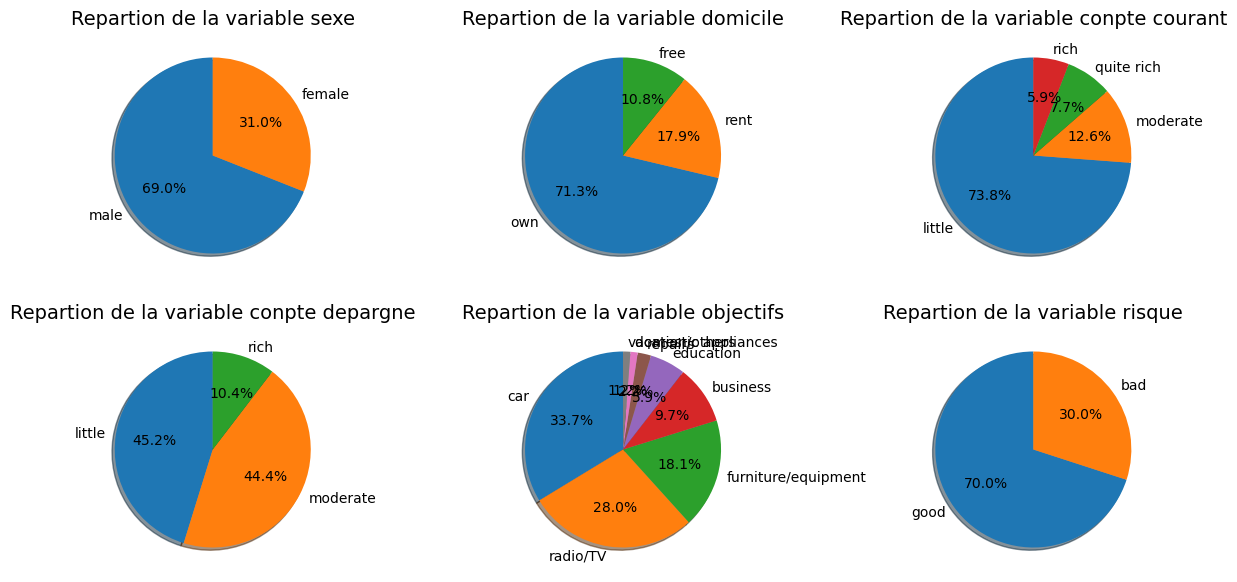

In [ ]:
cat_cols = [col for col in data.columns if data[col].dtypes == 'O'] # selection des colonnes de types objets
i = 1
#repartion   = []
plt.figure(figsize=(15,7)) # grid de figure
for col in cat_cols:
    #repartion.append(data[col].value_counts())
    plt.subplot(2,3,i)
    # traçons les diagrammes circulaire pour chaque variable afin de savoire les proportions des classes pour chacune d'elles
    plt.pie(data[col].value_counts(), labels=data[col].value_counts().index,autopct='%1.1f%%',shadow=True,startangle=90)
    plt.title(f"Repartion de la variable {col}",fontsize = 14) # titre des figures
    i +=1

###  Multicolinéarité

1 . Variance Inflation Factor (VIF) : privilégier des variables avec un VIF < 5

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
# selection des noms des colonnes de types numeriques
cat_cols1 = [col for col in data.columns if data[col].dtypes == 'int64']
# Calcul du VIF
vif_data = pd.DataFrame() # creatiation d'un dataframe vide
vif_data['Variable'] = cat_cols1 # creation d'une colonne nommer variable
# determination de VIF pour chaque variable 
vif_data['VIF'] = [variance_inflation_factor(data[cat_cols1].values, i) for i in range(data[cat_cols1].shape[1]) ]
print(vif_data)

  Variable       VIF
0      age  5.672031
1  travail  6.998974
2   credit  3.946969
3    duree  6.002435


2. Matrice de corrélation : éviter des variables fortement corrélées (corrélation > 0.7).

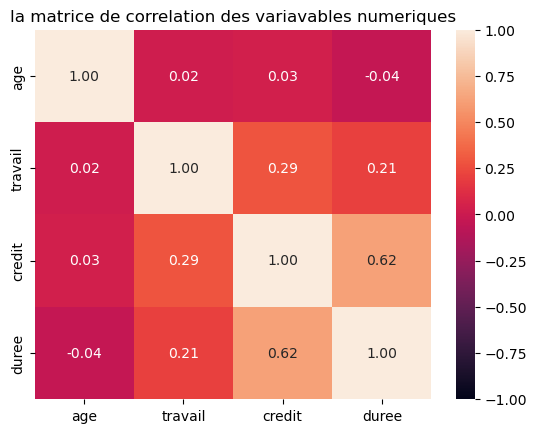

In [ ]:
# matrice de correlation des variables numerique
sns.heatmap(data[cat_cols1].corr(),annot=True,fmt=".2f",vmin=-1,vmax=1).set_title("la matrice de correlation des variavables numeriques");

In [21]:
X = data.drop("risque",axis=1)
y = data[['risque']]

### Encodage des variables qualitative

In [22]:
en = LabelEncoder()
y_endo = en.fit_transform(y)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
X_en = [col for col in X.columns if X[col].dtypes == 'O']
liste_variables_qualitatives  = []
for colonne in X_en:
    liste_variables_qualitatives.append(en.fit_transform(X[colonne]))
    
liste_variables_qualitatives = pd.DataFrame(np.array(liste_variables_qualitatives).T,columns=list(X_en))

In [24]:
Variables_explicatifs = pd.concat([liste_variables_qualitatives,Variables_numerique],axis=1)

Proportions de classes dans l'entraînement : [210 490]
Proportions de classes dans le test : [ 90 210]

=== Rapport de classification (sans correction) ===
              precision    recall  f1-score   support

           0       0.63      0.30      0.41        90
           1       0.75      0.92      0.83       210

    accuracy                           0.74       300
   macro avg       0.69      0.61      0.62       300
weighted avg       0.72      0.74      0.70       300



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Proportions après SMOTE : [490 490]

=== Rapport de classification (avec SMOTE) ===
              precision    recall  f1-score   support

           0       0.51      0.64      0.57        90
           1       0.83      0.73      0.78       210

    accuracy                           0.71       300
   macro avg       0.67      0.69      0.67       300
weighted avg       0.73      0.71      0.72       300


=== Rapport de classification (avec pondération) ===
              precision    recall  f1-score   support

           0       0.50      0.72      0.59        90
           1       0.85      0.69      0.76       210

    accuracy                           0.70       300
   macro avg       0.68      0.71      0.68       300
weighted avg       0.75      0.70      0.71       300



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

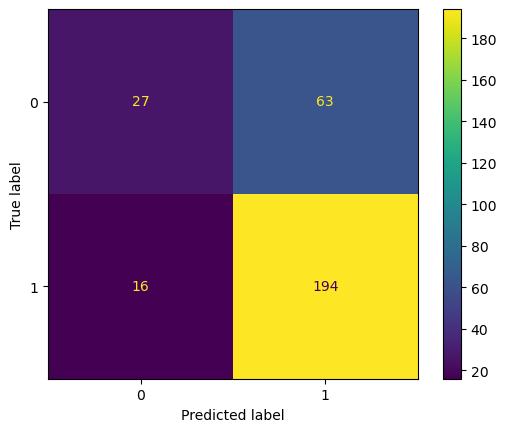

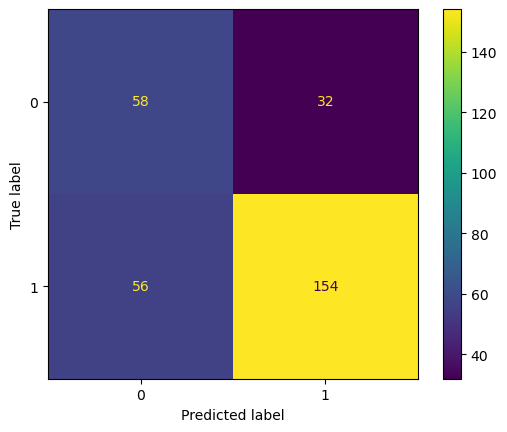

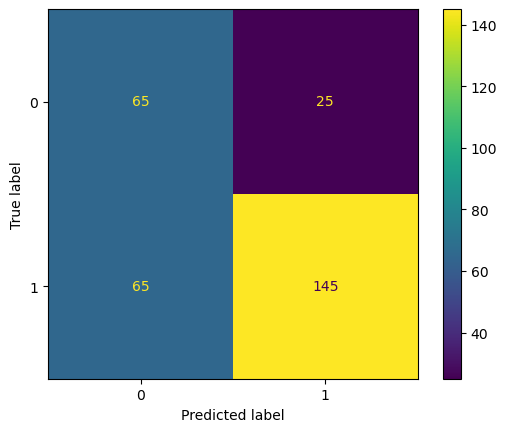

In [ ]:
# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(Variables_explicatifs, y_endo, test_size=0.3, stratify=y, random_state=42)

# Afficher la répartition des classes
print(f"Proportions de classes dans l'entraînement : {np.bincount(y_train)}")
print(f"Proportions de classes dans le test : {np.bincount(y_test)}")

# 2. Modèle de régression logistique sans correction
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n=== Rapport de classification (sans correction) ===")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

# 3. Correction avec SMOTE (suréchantillonnage)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"\nProportions après SMOTE : {np.bincount(y_train_smote)}")

model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)

print("\n=== Rapport de classification (avec SMOTE) ===")
print(classification_report(y_test, y_pred_smote))
ConfusionMatrixDisplay.from_estimator(model_smote, X_test, y_test)

# 4. Correction avec pondération des classes
model_weighted = LogisticRegression(class_weight='balanced', random_state=42)
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)

print("\n=== Rapport de classification (avec pondération) ===")
print(classification_report(y_test, y_pred_weighted))
ConfusionMatrixDisplay.from_estimator(model_weighted, X_test, y_test)


## Creation de pipeline

In [26]:
Variables_categoriques = Variables_categoriques.drop('risque',axis=1)
Variables_categoriques.head()

,sexe,domicile,conpte courant,conpte depargne,objectifs
0,male,own,NaN,little,radio/TV
1,female,own,little,moderate,radio/TV
2,male,own,little,NaN,education
3,male,free,little,little,furniture/equipment
4,male,free,little,little,car


In [27]:
num_var = list(Variables_numerique.columns)
cat_var = list(Variables_categoriques.columns)

In [28]:
pipeline_numerique = make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())

pipeline_categorique = make_pipeline(SimpleImputer(strategy = 'most_frequent'),
                                     OneHotEncoder(handle_unknown='ignore'))

In [29]:
transformer = make_column_transformer((pipeline_numerique,num_var),
                                      (pipeline_categorique,cat_var))

In [30]:
X = data.drop('risque',axis= 1)
Targets = (data[['risque']])

In [31]:
X.shape

(1000, 9)

In [32]:
Targets.shape

(1000, 1)

In [33]:
# Diviser les données en ensembles d'entraînement et de test

X_train, X_test, y_train, y_test = train_test_split(X, Targets, test_size=0.2, random_state=42)

# Liste des modèles à tester
list_models = [RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier(),LogisticRegression(),SVC()]

# Transformer pour normaliser les données
#transformer1 = StandardScaler()

# Boucle sur les modèles
for model in list_models:
    # Créer le pipeline
    pipelinefinal = make_pipeline(transformer, model)
    
    # E
    # ntraîner le pipeline
    pipelinefinal.fit(X_train, y_train)
    
    # Évaluer la précision sur les données de test
    score = pipelinefinal.score(X_test, y_test)
    
    # Afficher le score du modèle
    print(f"Modèle : {model.__class__.__name__}")
    print(f"Score : {score}")
    print("************************")

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Modèle : RandomForestClassifier
Score : 0.685
************************
Modèle : DecisionTreeClassifier
Score : 0.615
************************


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Modèle : KNeighborsClassifier
Score : 0.665
************************
Modèle : LogisticRegression
Score : 0.7
************************
Modèle : SVC
Score : 0.705
************************


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Optimisation des modeles de prediction